# EDA palmer penguins 

Análisis exploratorio de datos del data set `palmer penguins` como proyecto del curso ["Análisis exploratorio de datos"](https://platzi.com/cursos/analisis-exploratorio-datos/).

![penguins](./imgs/penguins.png)

Configuración inicial para recargar los modulos propios del proyecto:

In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append("..")

import eda_penguins_modules.utils.paths as path

Librerias:

In [2]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Apariencia general de los graficos

In [5]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Preview y carga del data set

In [10]:
input_file = path.data_processed_dir("preprocessed_palmerpenguins.csv")
penguins_df = pd.read_csv(input_file)
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Glosario de variables
El data set consta de 8 variables, aquí una breve descripción del significado de cada varibale del dataset
- `species`: Nombre de la especie del pingüino (Chinstrap, Adélie, or Gentoo).
- `island`: Nombre de la isla.
- `bill_length_mm`: Largo del pico en milimetros.
- `bill_depth_mm`: Profundidad/ancho del pico en milimetros.
- `flipper_length_mm`: Largo de la aleta en milimetros.
- `body_mass_g`: Masa corporal en gramos.
- `sex`: Sexo del pingüino (Male/Female).
- `year`: Año en que se tomó la muestra.

<div align="center">
  <img src="./imgs/bill_depth.png" alt="Bill/Culmen characteristics" width="500" heigh="500">
</div>

## Validación de datos

**¿Qué tipo de datos son las variables del dataset?**

In [12]:
penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**¿Cuántas variables de cada tipo de datos tenemos en el dataset?**

In [14]:
(
  penguins_df
  .dtypes
  .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**¿Cuantas variables y observaciones tenemos?**

In [18]:
rows, columns = penguins_df.shape
print(f"Observaciones: {rows}")
print(f"variables: {columns}")

Observaciones: 344
variables: 8


**¿Existen valores nulos explícitos?**

In [21]:
(
  penguins_df
  .isnull()
  .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**De tener observaciones con valores nulos, ¿cuántos tenemos por cada variable?** 

In [22]:
(
  penguins_df
  .isnull()
  .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**¿Cuántos valores nulos hay en total en el dataset?**

In [23]:
(
  penguins_df
  .isnull()
  .sum()
  .sum()
)

19

**¿Cuál es la proporción de los valores nulos por cada variable?**

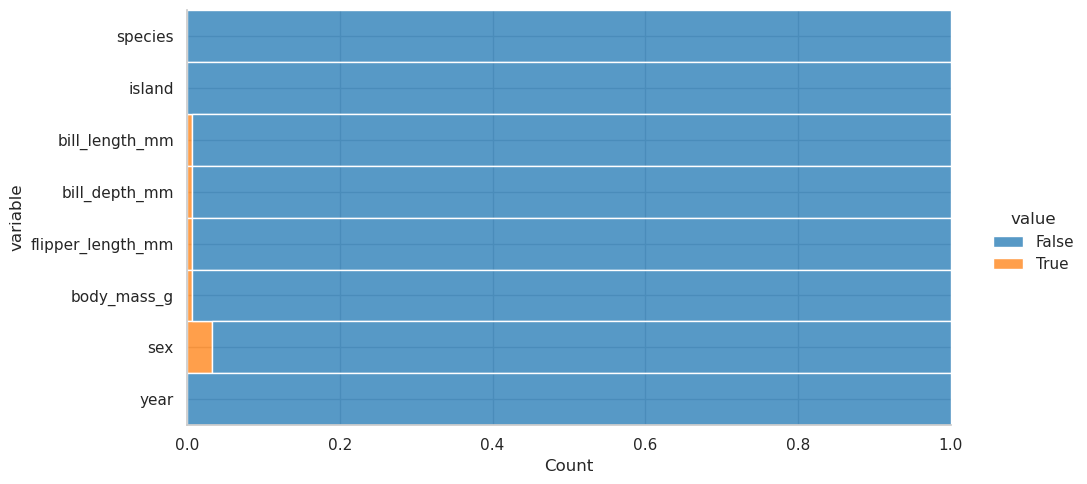

In [34]:
(
  penguins_df
  .isnull()
  .melt()
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=2
      )
    )
  )
)
plt.show()

**Visualizando valores nulos en todo el dataset**

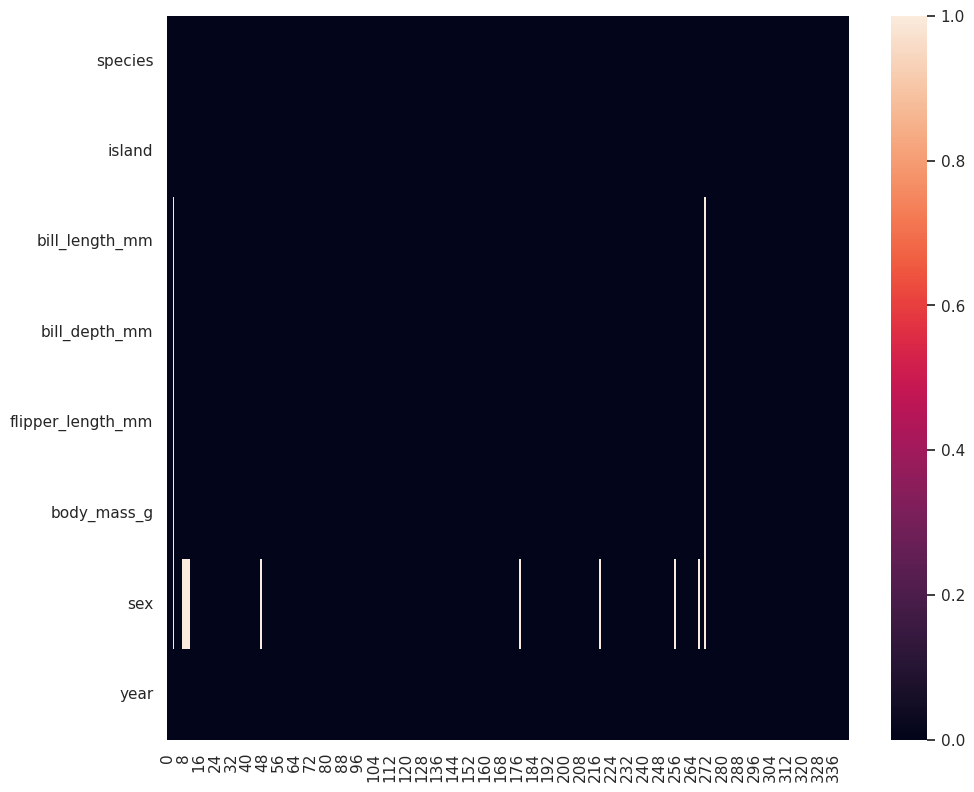

In [37]:
(
  penguins_df
  .isnull()
  .transpose()
  .pipe(
    lambda df: (
      sns.heatmap(data=df)
    )
  )
)
plt.show()

In [43]:
penguins_df.loc[271]

species              Gentoo
island               Biscoe
bill_length_mm          NaN
bill_depth_mm           NaN
flipper_length_mm       NaN
body_mass_g             NaN
sex                     NaN
year                   2009
Name: 271, dtype: object

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [47]:
penguins_df.shape

(344, 8)

In [46]:
processed_penguins_df = penguins_df.dropna()
processed_penguins_df.shape

(333, 8)